# [SWCON253] Machine Learning
Instructor: Eunseop Shin (kairos9603@khu.ac.kr)

Professor: Hui Yong Kim (hykim.v@khu.ac.kr)

---

# P4.A:  K-NN을 이용한 분류기 학습 (5점)

### 학습목표
- K-NN 모델을 이용하여 분류기를 학습 할 수 있다.
- Scikit-Learn을 이용하여 모델 학습, 검증 과정을 구현할 수 있다.

### 실습내용
Scikit-Learn의 KNN을 이용하여 분류기를 학습해봅니다. 

실습은 다음 순서로 진행됩니다.
- 1) 주어진 데이터셋 loading
- 2) 모델 구현, 학습 **<직접 구현>**
- 3) 모델 검증 **<직접 구현>**
- 4) Decision Boundary 시각화 **<직접 구현>**
- 5) Discussion

**이번 실습에서 여러분은 `2), 3), 4)` 부분의 코드를 직접 작성합니다.**

앞으로 대부분의 실습도 위와 같은 순서로 진행됩니다. 이번 실습을 통해 각 부분의 코드를 이해하고 다음 실습에 참고하도록합니다.


### 점수
- KNN 모델 작성: 4점, `#<your code>` 한 부분 마다 1점.
- Discussion: 1점

`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

## Imports

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Loading the Dataset
iris 데이터셋을 load 합니다.

IRIS 데이터셋은 붓꽃 데이터셋으로, 붓꽃의 4가지 특징을 이용해 3개의 다른 종류를 구별하기 위한 데이터셋 입니다.
> 4개의 특징: 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'

이 실습에서는 중간 2개의 특징만 사용합니다.

In [29]:
iris = datasets.load_iris()
X = iris.data[:, 1:3]  # we only take the first two features.
y = iris.target

### Dataset Split & Visualization
데이터셋을 SciKit-Learn의 `train_test_split` 함수를 이용하여 모델 학습과 검증을 위해 Trainset과 Testset으로 랜덤 샘플링하여 나누고 데이터셋이 어떤 분포로 생겼는지 시각화하여 살펴봅니다.

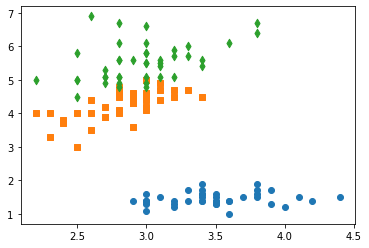

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, iris.target, test_size=0.2)      # test를 20% 만큼 사용하도록 trainset, testset split        

# 데이터셋 plot
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            marker='s')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 2], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 2],
            marker='d')
plt.show()

## 2)모델 구현, 학습
이 부분에서는 Scikit-Learn의 KNeighborsClassifier모듈을 이용하여 K-NN모델을 선언하고 학습합니다.

![](https://raw.githubusercontent.com/artifabrian/dynamic-knn-gpu/master/knn.png)

KNN은 비모수(Non-Parametric)모델로 이전의 퍼셉트론, SVM과 다르게 고정된 파라미터의 갯수로 설명되지 않는 모델입니다. 비모수 모델은 입력데이터가 늘어남에 따라 파라미터도 증가하는 모델입니다. 

KNN은 다음 세가지 단계로 학습이 이루어집니다.
1. 숫자 k와 거리 측정 기준을 선택합니다.
2. 분류하려는 샘플에서 K개의 최근접 이웃을 찾습니다.
3. 다수결 투표, 즉 이웃중 가장 많은 class를 갖는 레이블로 레이블을 할당합니다.

위 그림에서는 KNN의 학습과정을 설명하고 있습니다. 위 그림에선 K를 3으로 설정하였습니다. 따라서 마지막 그림에서 3개의 최근접 이웃을 선택하였고 세개중 두개의 이웃이 class B임으로 데이터는 B로 분류됩니다. KNN은 다수결 투표 방식이기 때문에 K가 홀수 이어야 합니다.

KNeighborsClassifier에서도 K와 거리 측정 기준을 선택 할 수 있습니다. 
- n_neighbors 파라미터가 몇개의 최근접 이웃을 선택할지를 정하는 K입니다.
- metric 파라미터가 거리 측정 기준입니다.

이제 아래 `# <your code>` 부분을 채워 넣어서 코드를 직접 구현하세요.

In [31]:
knn = KNeighborsClassifier(n_neighbors = 3, metric='minkowski') # <your code> 
knn.fit(X_train, y_train)  # <your code> training with train dataset

KNeighborsClassifier(n_neighbors=3)

## 4) 모델 검증
Training set과 Test set각각에서 모델의 accuracy를 계산합니다.

In [32]:
# Train dataset에서 성능 검증
train_acc = knn.score(X_train, y_train)# <your code> calculate train accuracy
print('Train set accuracy: %.2f%%' % (train_acc*100))
# Test dataset에서 성능 검증
test_acc = knn.score(X_test, y_test)# <your code> calculate test accuracy
print('Test set accuracy: %.2f%%' % (test_acc*100))

Train set accuracy: 96.67%
Test set accuracy: 90.00%


## 5) Decision Boundary
train 데이터셋과 test 데이터셋 각각을 이용하여 2개의 scatter plot을 그리고 그 위에 학습된 가중치를 이용하여 결정경계를 시각화합니다.

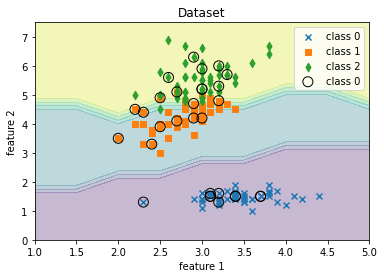

In [33]:
### 데이터셋에서 Decision Boundary 시각화
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Decision Boundary를 표시하기 위해
# x1_min부터 x1_max까지 0.02간격으로, x2_min부터 x2_max까지 0.5간격의 모든 점의 좌표를 반환
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.5),
                       np.arange(x2_min, x2_max, 0.5),)
Z = knn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3) # 범위를 색으로 표시

# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X) if y[idx] == 0], 
            [i[1] for idx, i in enumerate(X) if y[idx] == 0],
            label='class 0', marker='x')
plt.scatter([i[0] for idx, i in enumerate(X) if y[idx] == 1], 
            [i[1] for idx, i in enumerate(X) if y[idx] == 1],
            label='class 1', marker='s')
plt.scatter([i[0] for idx, i in enumerate(X) if y[idx] == 2], 
            [i[1] for idx, i in enumerate(X) if y[idx] == 2],
            label='class 2', marker='d')
## testset 강조
plt.scatter([i[0] for idx, i in enumerate(X_test)],
            [i[1] for idx, i in enumerate(X_test)],
            label='class 0', facecolors='none', edgecolor='black', s=100, marker='o')

# 그래프로 표현
plt.title('Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

## 6) Discussion

**1) KNN의 장점과 단점을 설명해보세요.**
장점 : 단순, 효율적이며, 훈련 단계가 빠르다.
기저데이터 분포에 대한 가정을 하지 않으며, 수치 기반 데이터 분류 작업에서 성능이 우수하다.
단점 : 적절한 k의 선택이 중요하다. 또한 데이터가 많아지면 분류 단계가 느려진다.

**2) KNN에서 사용될 수 있는 distance matric에대해 설명해보세요.**
 KNeighborsClassifier 함수의 인자인 metric에는 minkowski가 들어갈 수 있으며, minkowski는 유클리드 거리와 맨하튼 거리를 일반화 한 것이다. 유클리드 거리는 좌표계의 두 점의 최단거리를 말하며, 맨하튼 거리는 L1거리(택시거리)이다. 따라서 distance metric을 통해 거리를 어떤 방식으로 구할지 결정할 수 있으며, 또 다른 인자로 주어질 수 있는 p의 값이 1이면 맨하튼 거리, 2이면 유클리드 거리이다. KNeighborsClassifier의 default 값은 2이다.
minkowski 외에도 euclidean, mahattan, chebyshev 등이 들어갈 수 있다.

**3) 구현하면서 든 질문에 대해 적고, 답할 수 있다면 스스로 답해보세요.**
distance metric에 따라 결과가 어느 정도 수준에서 달라질까 궁금하다.

---

# P4.B:  GMM을 이용한 군집화 (5점)

### 학습목표
- GMM 모델을 이용하여 IRIS데이터를 군집화 할 수 있다.
- Scikit-Learn을 이용하여 모델 학습, 검증 과정을 구현할 수 있다.

### 실습내용
Scikit-Learn의 GMM을 이용하여 군집화를 학습해 봅니다. 

실습은 다음 순서로 진행됩니다.
- 1) 데이터셋 loading
- 2) GMM 모델 구현, 학습, 검증, Decision Boundary 시각화 **<직접 구현>**
- 3) Discussion

**이번 실습에서 여러분은 `2) SVM 모델 구현, 학습, 검증, Decision Boundary 시각화` 부분의 코드를 직접 작성합니다.**

앞으로 대부분의 실습도 위와 같은 순서로 진행됩니다. 이번 실습을 통해 각 부분의 코드를 이해하고 다음 실습에 참고하도록합니다.


### 점수
- 모델 작성: 5점, `#<your code>` 한 부분 마다 1점.

`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

In [34]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1) 데이터셋 loading
앞의 실습에서 사용하였던 IRIS 데이터를 사용합니다.

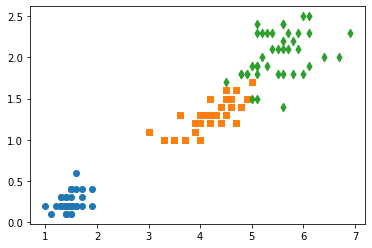

In [35]:
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # we only take the first two features.
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, iris.target, test_size=0.2) # <your code> split dataset into trainset and testset with using 20% as testset

# 데이터셋 plot
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            marker='s')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 2], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 2],
            marker='d')
plt.show()

## 2) GMM 모델 구현, 학습, 검증

GMM모델을 이용하여 위 데이터셋을 군집화해 봅니다.

GMM은 군집화 모델중 모수모델로, EM(Expectation Maximization)알고리즘을 사용하여 학습하는 가장 대표적인 모델입니다.

![](https://mblogthumb-phinf.pstatic.net/MjAxOTA4MzBfMjM1/MDAxNTY3MTEzOTE2NDc0.9HQ3jx7pIDJ4TQ7bJTN23wh9bJVcReVjLlwbTBDqxY8g.I8RXKbOa1LD698_VK3c_z6NXZ97vTXl_p72eidlM2i8g.PNG.jinp7/image.png?type=w800)

위 그림처럼 학습을 진행합니다.

1. 초기화, 군집의 중심점을 랜덤으로 초기화 합니다.
2. 각 sample이 군집에 속할 확률을 예측(Expectation) 합니다.
3. 예측값이 최대화(Maximization)되도록 중심점을 업데이트 합니다.
4. 수렴될 때까지 2,3을 반복합니다.

군집화 모델에서 중요한 점은 초기화시에 몇개의 군집으로 나눌지 미리 설정해주어야 한다는 점입니다. 이 숫자에 따라 군집화모델의 성능이 크게 차이 날 수 있습니다.

Scikit-Learn의 GaussianMixture 이용하여 GMM을 학습해 봅니다. 
GaussianMixture의 `n_components`를 이용하면 군집의 갯수를 정할 수 있습니다.

In [36]:
gmm = GaussianMixture(n_components=3)# <your code> GaussianMixture 모델 생성
gmm.fit(X_train)  # <your code> 학습

GaussianMixture(n_components=3)

Train set score: -0.85
Test set score: -1.17


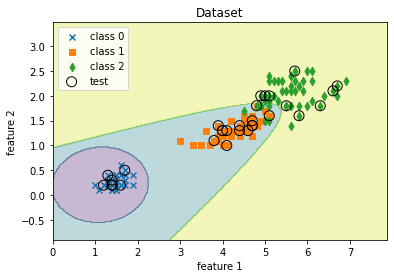

In [37]:
# Train dataset에서 per-sample average log-likelihood 스코어
train_score = gmm.score(X_train, y_train)# <your code>
print('Train set score: %.2f' % (train_score))

# Test dataset에서 per-sample average log-likelihood 스코어
test_score = gmm.score(X_test, y_test)# <your code>
print('Test set score: %.2f' % (test_score))

### 데이터셋에서 Decision Boundary 시각화
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Decision Boundary를 표시하기 위해
# x1_min부터 x1_max까지 0.02간격으로, x2_min부터 x2_max까지 0.02간격의 모든 점의 좌표를 반환
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = gmm.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3)

# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X) if y[idx] == 0], 
            [i[1] for idx, i in enumerate(X) if y[idx] == 0],
            label='class 0', marker='x')
plt.scatter([i[0] for idx, i in enumerate(X) if y[idx] == 1], 
            [i[1] for idx, i in enumerate(X) if y[idx] == 1],
            label='class 1', marker='s')
plt.scatter([i[0] for idx, i in enumerate(X) if y[idx] == 2], 
            [i[1] for idx, i in enumerate(X) if y[idx] == 2],
            label='class 2', marker='d')
## testset 강조
plt.scatter([i[0] for idx, i in enumerate(X_test)],
            [i[1] for idx, i in enumerate(X_test)],
            label='test', facecolors='none', edgecolor='black', s=100, marker='o')

# 그래프로 표현
plt.title('Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

## 3) Discussion

**1) 군집화와, 분류의 차이점은 무엇인가요?**
군집화는 소속집단의 정보가 없고 label이 없으며 비지도학습이다. 분류는 소속집단의 정보를 이미 알고 있고 label이 있으며 지도학습이다.

**2) 군집화 모델의 score matric에 대해 설명해보세요.**
score metric이란 군집화 모델의 성능을 평가하기 위한 지표이다. 이에는 Silhouette metric이 있다. 실루엣 지표는 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지를 나타내며, 실루엣 계수를 기반으로 계산을 한다. 여기서 실루엣 계수는 해당 데이터가 같은 군집내 데이터와 얼마나 가깝게 군집화되어있고, 다른 군집의 데이터와는 얼마나 멀리 분리되어 있는지 나타내는 지표이다.

**3) 구현하면서 든 질문에 대해 적고 답할 수 있다면 스스로 답해보세요.**
Train, Test set score이 음수가 나오는 이유는 무엇일까?
-> gmm.score()은 각 데이터 포인트의 로그 확률을 리턴해주기 때문이다.